<a href="https://colab.research.google.com/github/msmsm104/TIL/blob/main/20220605/titanic_survival_prediction_0605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Contents of the Notebook

#### Exploratory Data Analysis(EDA)

    1) Analysis of the features.
    2) Finding any relations or trends considering multiple features.

#### Feature Engineering and Data Cleaning

    1) Adding any few features.
    2) Removing redundant features.
    3) Converting features into suitable form for modeling.

#### Predictive Modeling

    1) Running Basic Algorithms.
    2) Cross Validation.
    3) Ensembling
    4) Important Features Extraction.


## Part1 : Exploratory Data Analysis(EDA)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [53]:
base_path = '/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/TIL(Today I Learned)/20220605/titanic/data/'

data = pd.read_csv(base_path + 'train.csv')

In [54]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
## 결측치 확인
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

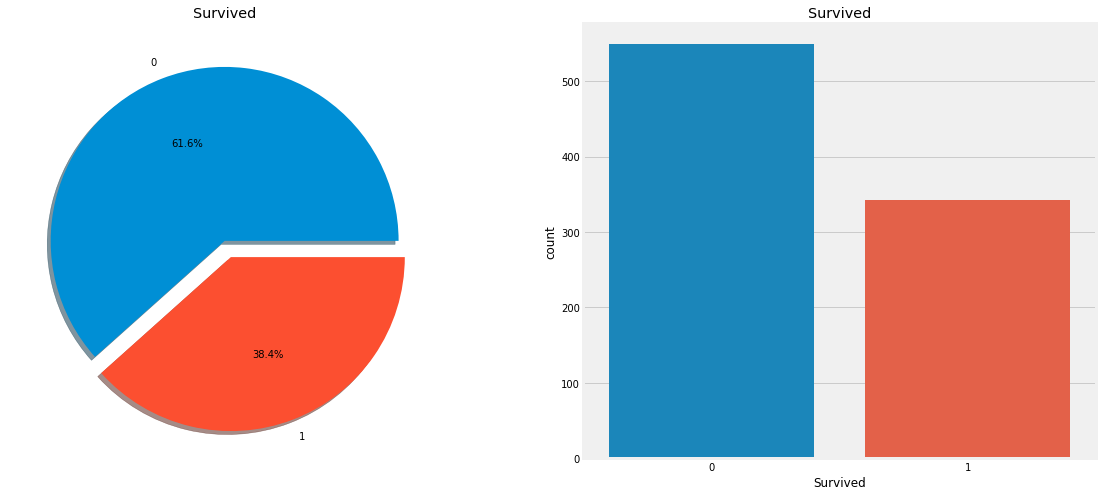

In [57]:


f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()



### Sex --> Categorical Feature

In [58]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

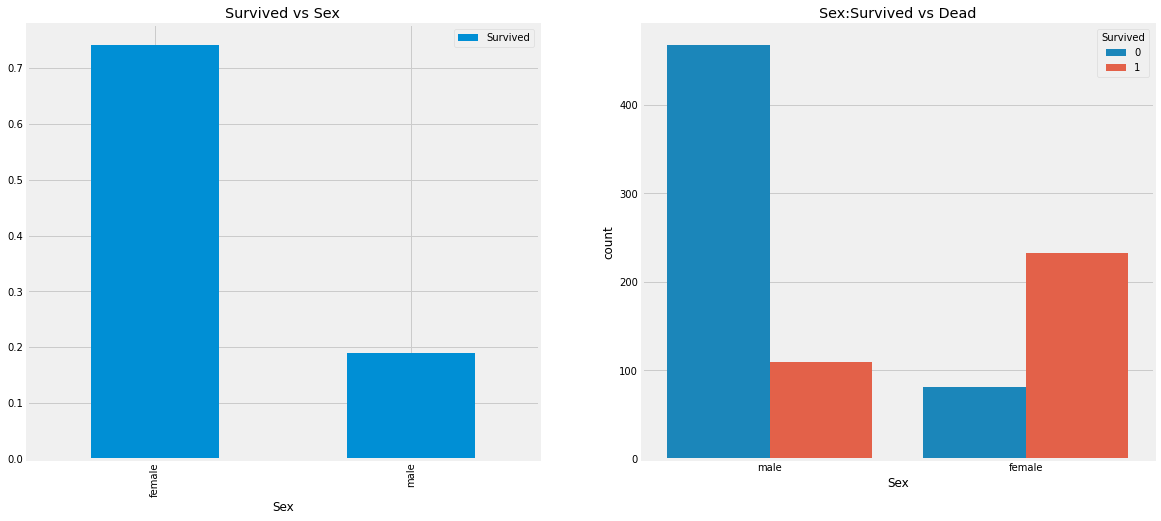

In [59]:


f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()



### Pclass --> Ordinal Feature

In [60]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True)\
.style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


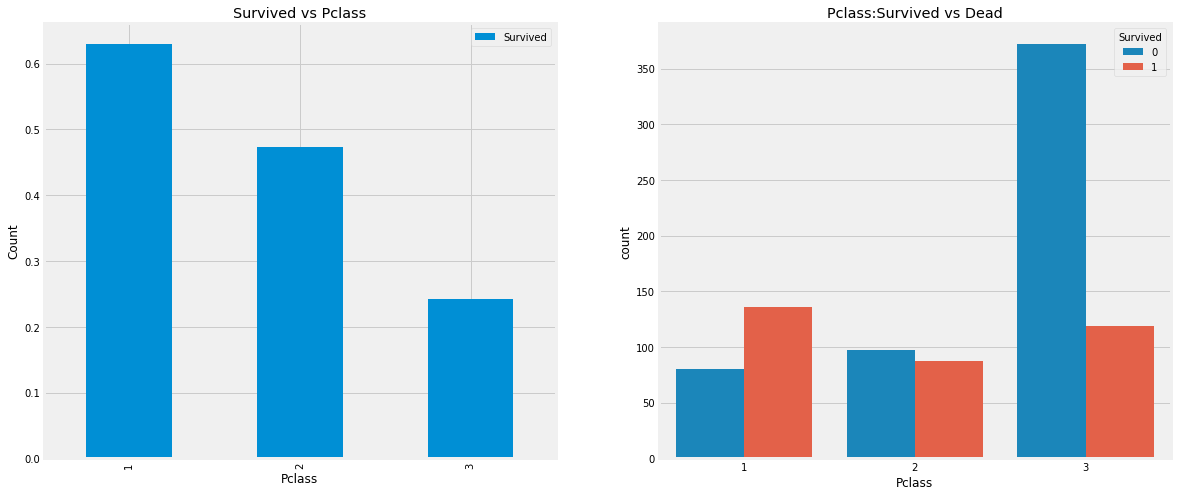

In [61]:


f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()



In [62]:
pd.crosstab([data['Sex'],data['Survived']], data['Pclass'], margins=True)\
.style.background_gradient(cmap='summer_r')

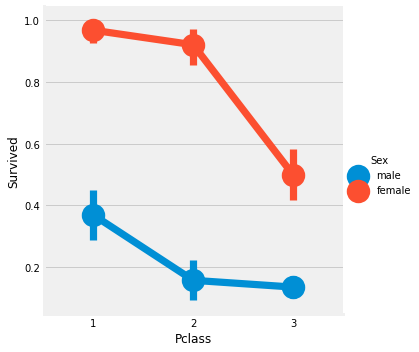

In [63]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

### Age --> Continous Feature

In [64]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


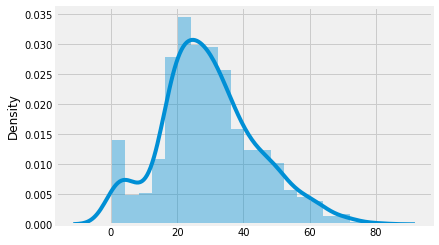

In [65]:
sns.distplot(x=data['Age'])

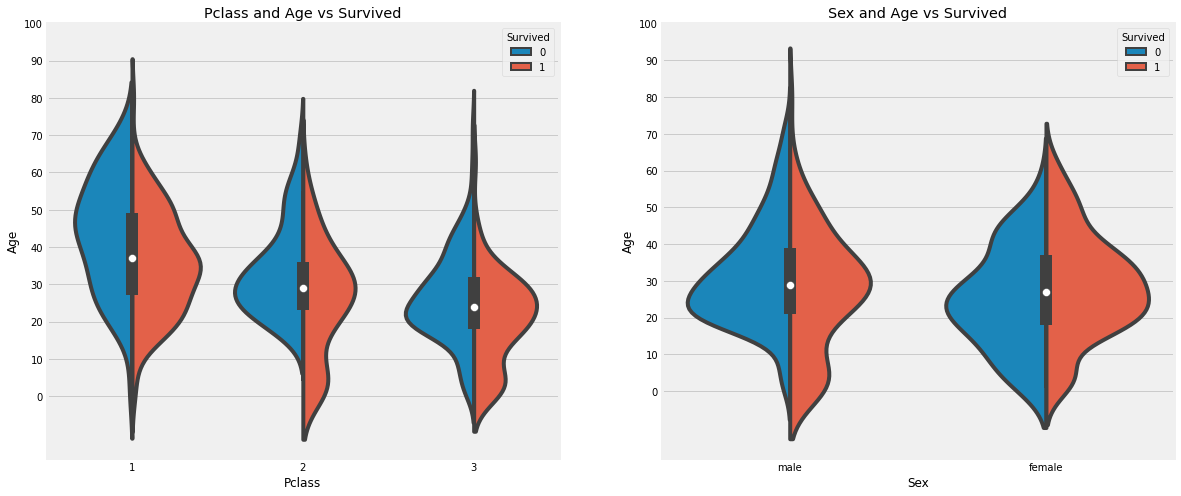

In [66]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [67]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [68]:
data['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [69]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [70]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [71]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [72]:
## Initial을 기준으로 Age의 결측치 채워주기

data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [73]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

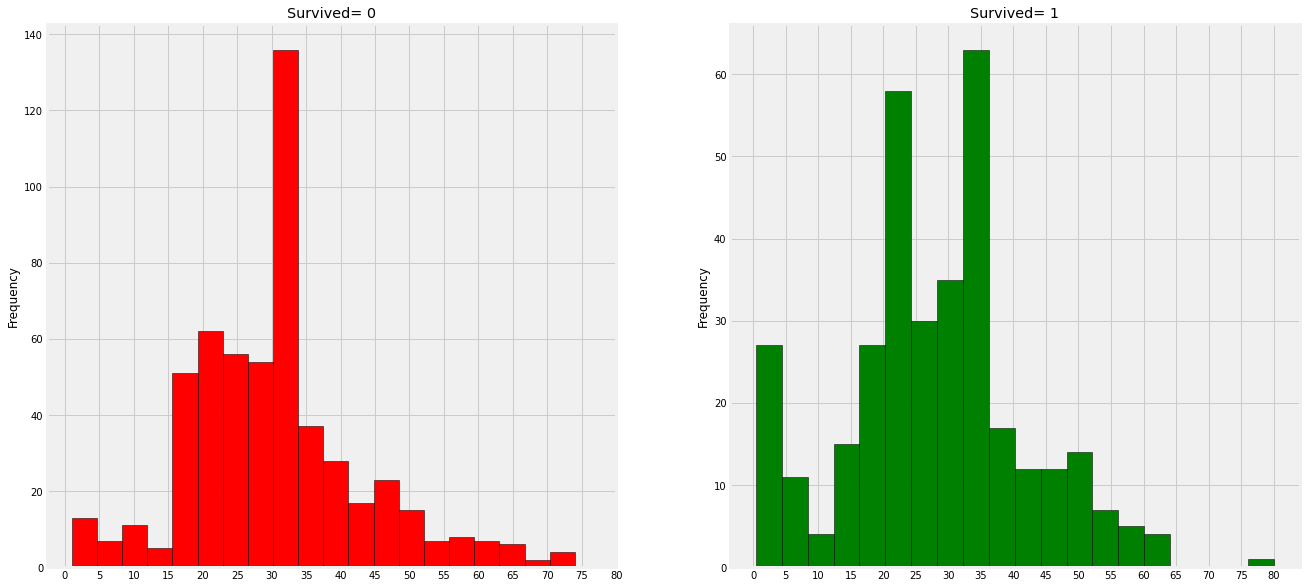

In [74]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

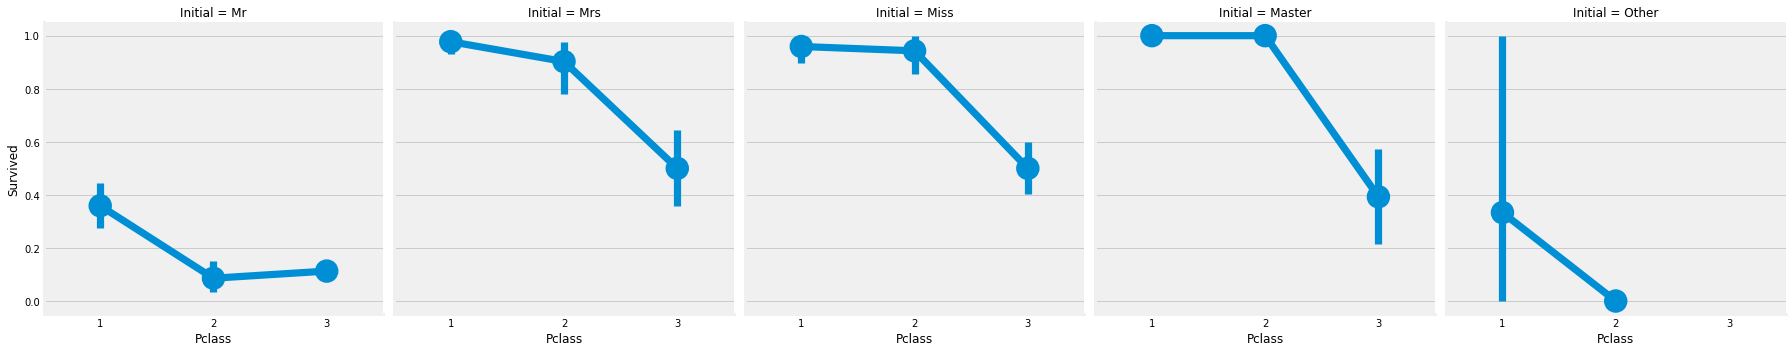

In [75]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

### Embarked --> Categorical Value

In [76]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

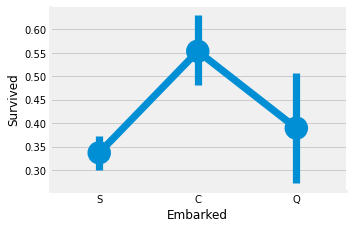

In [77]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

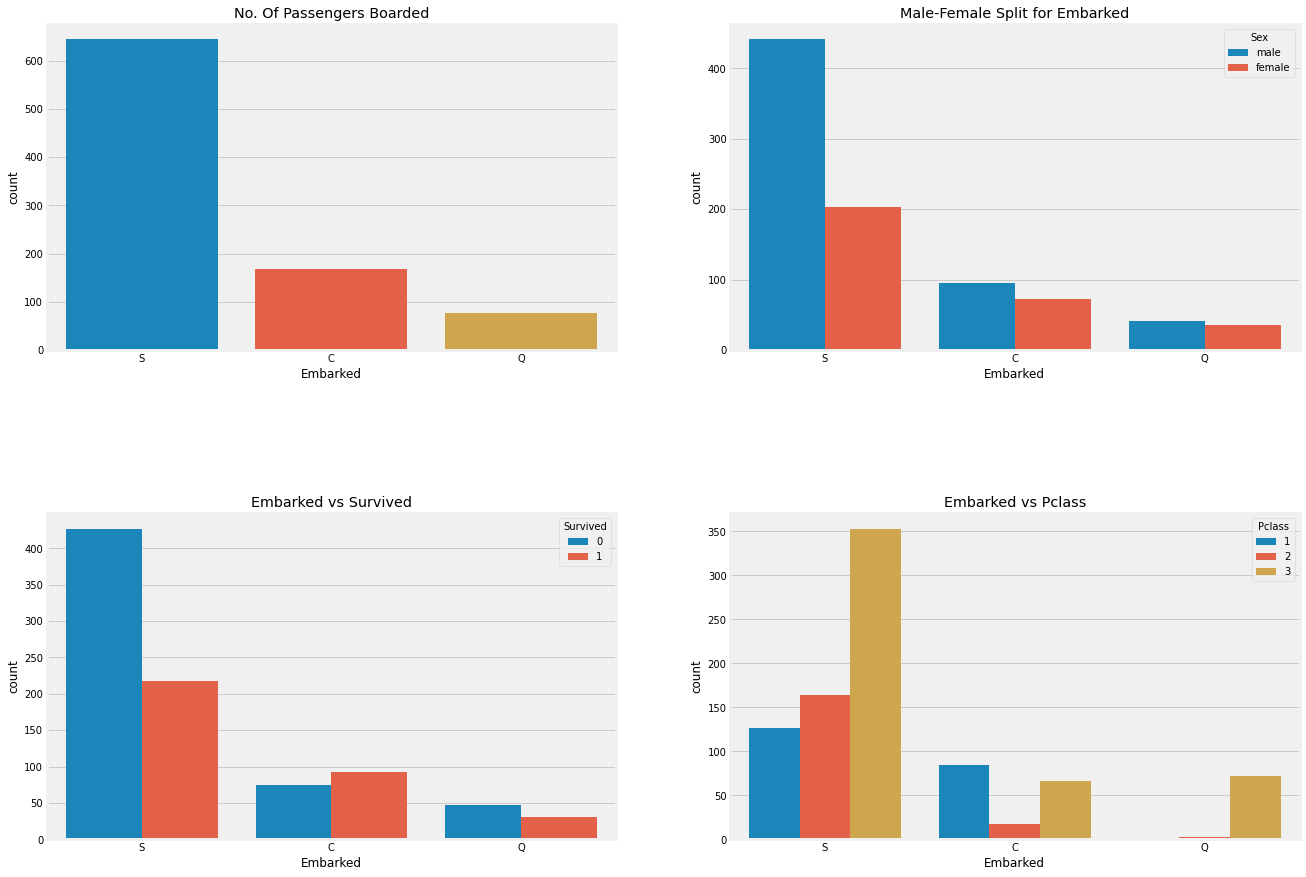

In [78]:


f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()



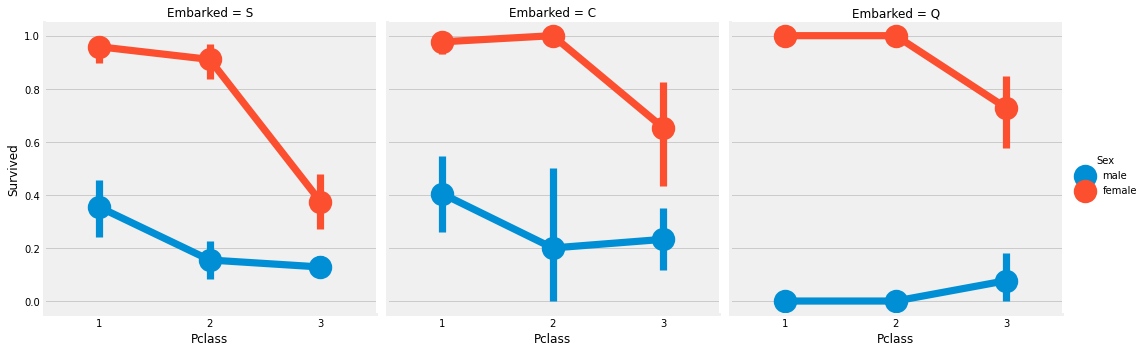

In [79]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [80]:
data['Embarked'].fillna('S',inplace=True)

In [81]:
data.Embarked.isnull().any()

False

### SibSip --> Discrete Feature

In [82]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


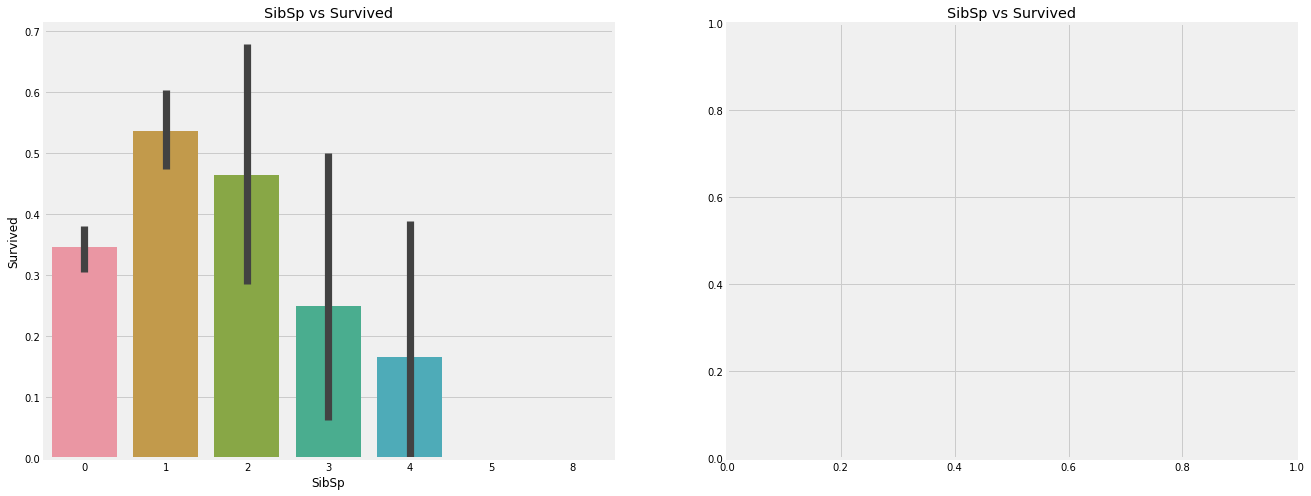

In [83]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [84]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch

In [85]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


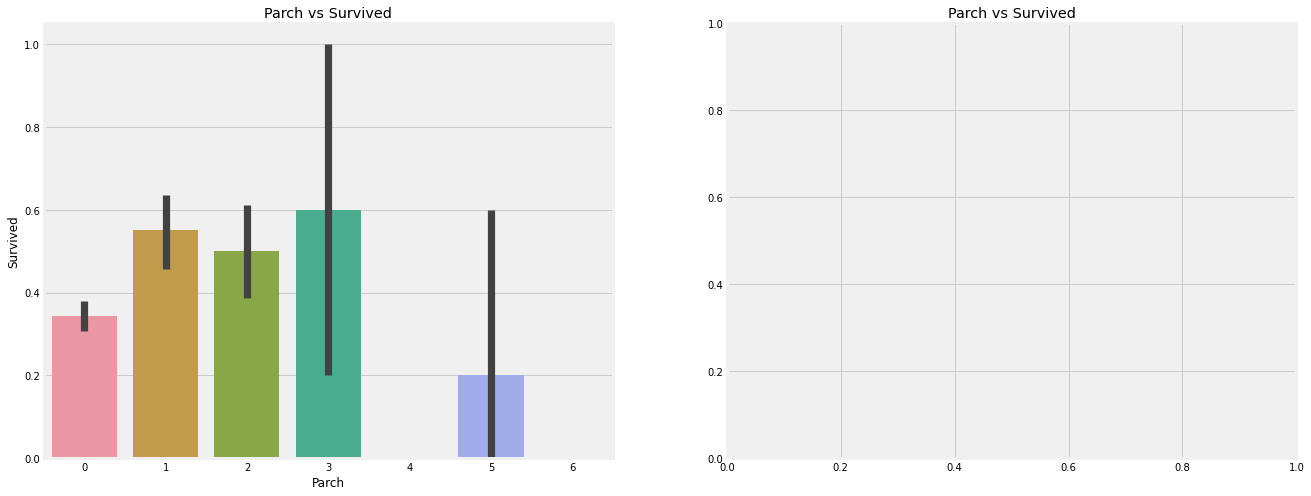

In [86]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Fare --> Continous Feature

In [87]:


print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())



Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


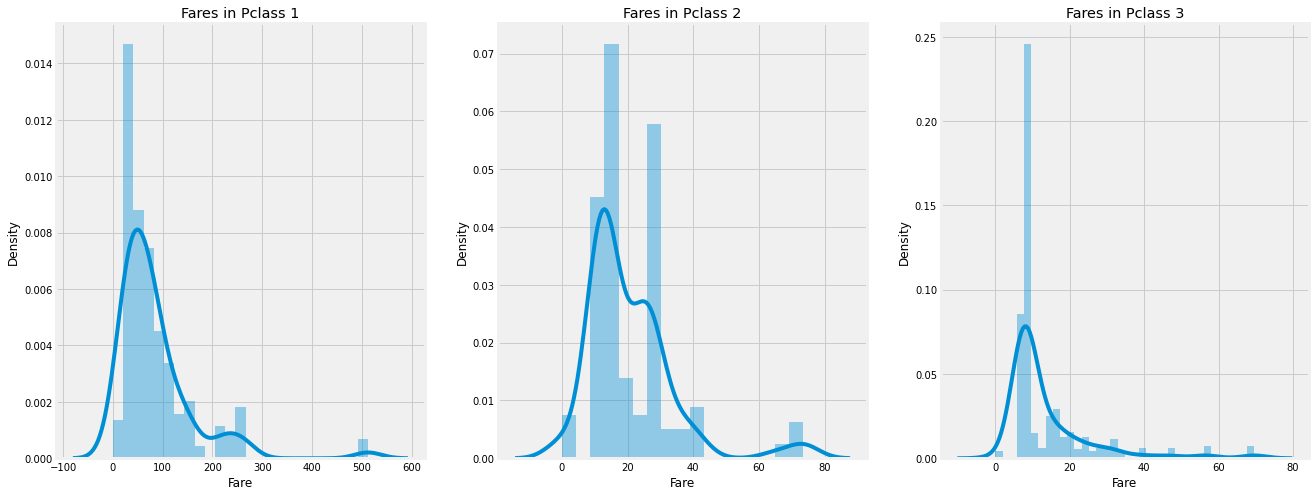

In [88]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

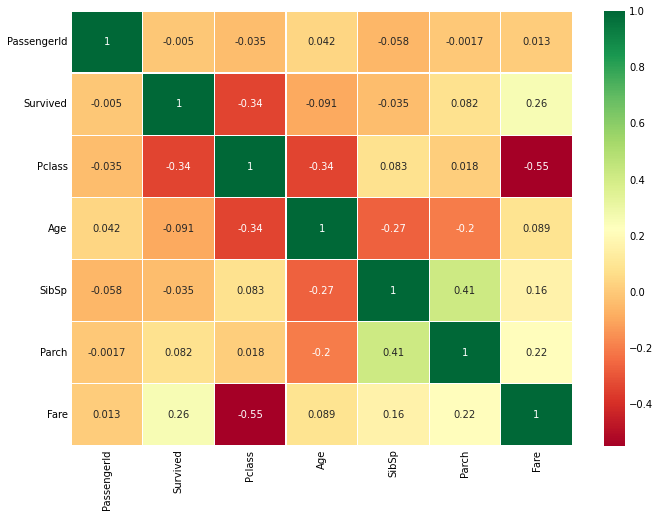

In [94]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', 
            linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

## Pclass-Fare/ SibSp-Parch 높은 상관관계를 보인다.
## 다중공선성 문제를 해결하기 위해 modeling 이전에 redundant feature를 제거해주는게 좋다.

## Part2: Feature Engineering and Data Cleaning

In [95]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

### Age_band

    - Coninous values into categorical values

In [96]:
data['Age_band'] = 0

In [97]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,0


In [98]:
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


In [104]:
data['Age_band'].value_counts().sort_index().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
0,104
1,382
2,325
3,69
4,11


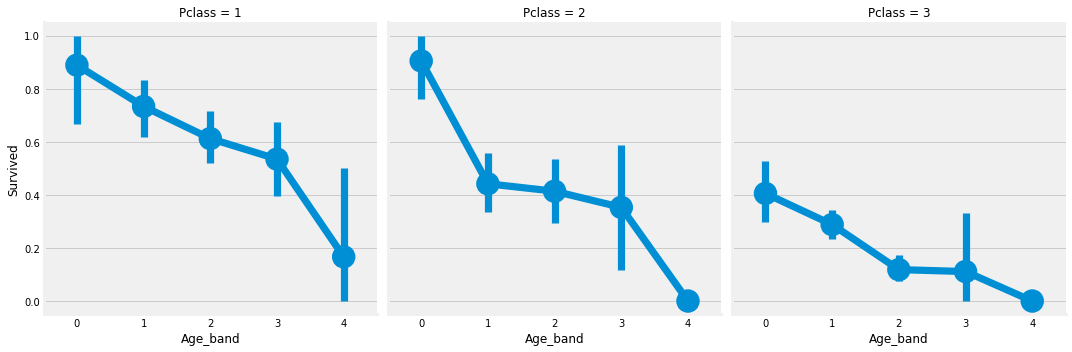

In [106]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')

## Family_Size and Alone

In [107]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']

In [108]:
data['Family_Size'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_Size, dtype: int64

In [109]:
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1

In [110]:
data['Alone'].mean()

0.6026936026936027

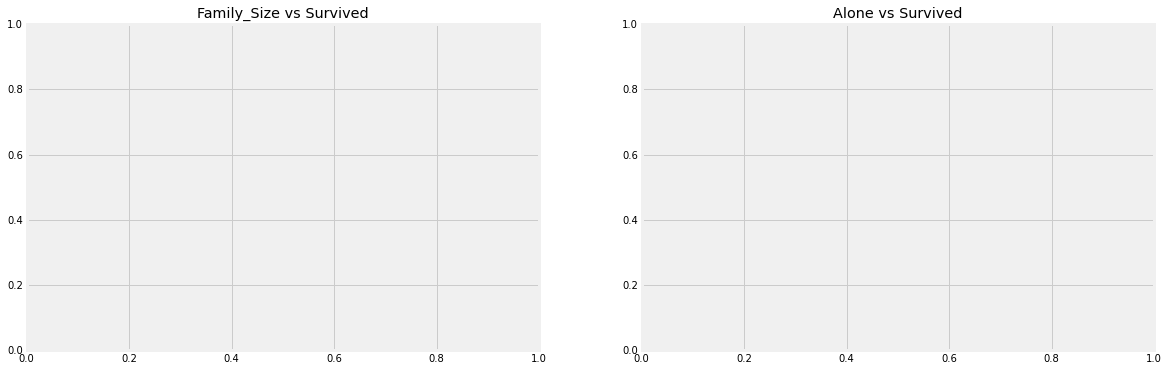

In [111]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)

plt.show()

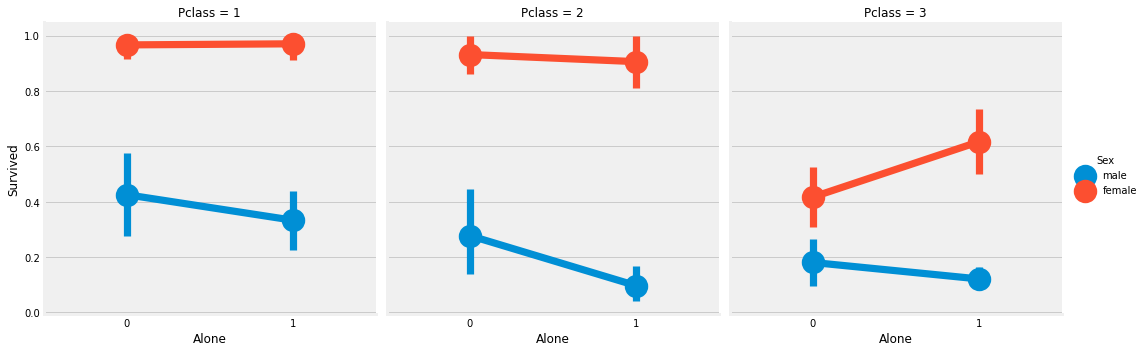

In [112]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [115]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.\
background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [116]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

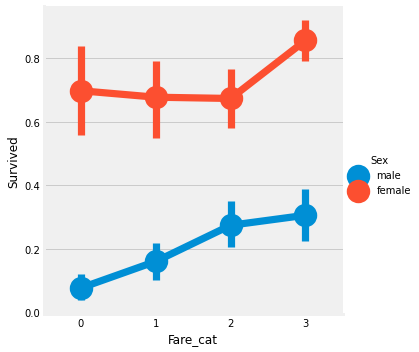

In [117]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

In [127]:
# data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Initial'], drop_first=True)
data.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Alone,Fare_Range,Fare_cat,Sex_male,Embarked_Q,Embarked_S,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,"(-0.001, 7.91]",0,1,0,1,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,"(31.0, 512.329]",3,0,0,0,0,0,1,0


In [129]:
data = data.drop(columns=['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'])

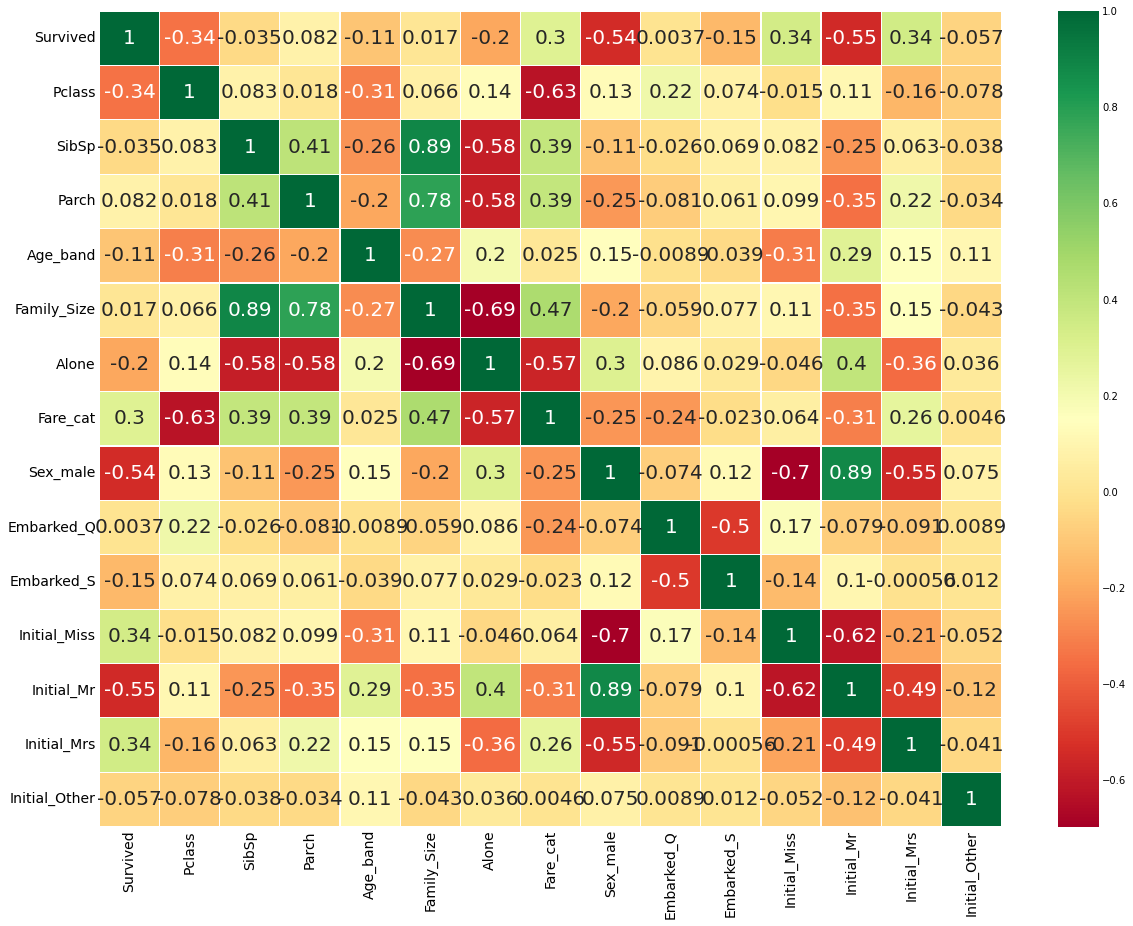

In [131]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [133]:
data.head(2)

,Survived,Pclass,SibSp,Parch,Age_band,Family_Size,Alone,Fare_cat,Sex_male,Embarked_Q,Embarked_S,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,0,3,1,0,1,1,0,0,1,0,1,0,1,0,0
1,1,1,1,0,2,1,0,3,0,0,0,0,0,1,0


## Part3: Predictive Modeling

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

In [137]:
feature = data.drop(columns='Survived')
target = data['Survived']

X_train, X_val, y_train, y_val = \
train_test_split(feature, target, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 14), (179, 14), (712,), (179,))

In [140]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)
pred_1 = model.predict(X_val)
print(f"Accuracy for rbf SVM is {accuracy_score(y_val, pred_1)}")

Accuracy for rbf SVM is 0.8212290502793296


### Linear Support Vector Machine (linear_SVM)

In [142]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(X_train, y_train)
pred_2 = model.predict(X_val)
print(f"Accuracy for linear SVM is {accuracy_score(y_val, pred_2)}")

Accuracy for linear SVM is 0.8044692737430168


### Logistic Regression

In [143]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred_3 = model.predict(X_val)
print(f"The accuracy of the Logistic Regression is {accuracy_score(y_val, pred_3)}")

The accuracy of the Logistic Regression is 0.8268156424581006


### Decision Tree

In [144]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred_4 = model.predict(X_val)
print(f"The accuracy of the Decision Tree is {accuracy_score(y_val, pred_4)}")

The accuracy of the Decision Tree is 0.8212290502793296


## K-Nearest Neighbours(KNN)

In [145]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred_5 = model.predict(X_val)
print(f"The accuracy of the KNN is {accuracy_score(y_val,pred_5)}")

The accuracy of the KNN is 0.8156424581005587


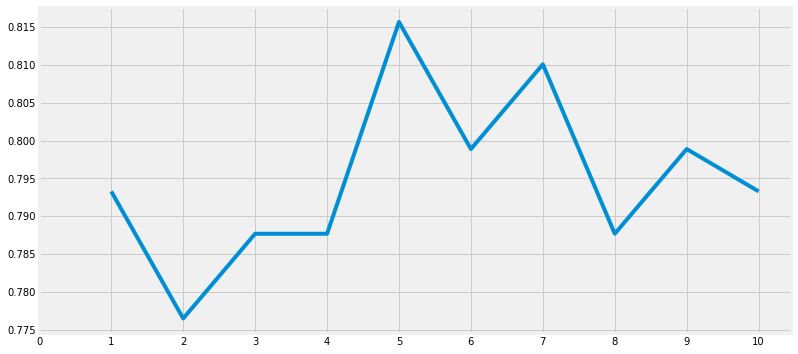

Accuracies for different values of n are: [0.79329609 0.77653631 0.7877095  0.7877095  0.81564246 0.79888268
 0.81005587 0.7877095  0.79888268 0.79329609] with the max value as  0.8156424581005587


In [147]:
a_index = list(range(1, 11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    a=a.append(pd.Series(accuracy_score(y_val, pred)))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

## Gaussian Naive Bayes

In [153]:
model = GaussianNB()
model.fit(X_train, y_train)
pred_6 = model.predict(X_val)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(y_val, pred_6))

The accuracy of the NaiveBayes is 0.8156424581005587


## Random Forests

In [152]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
pred_7 = model.predict(X_val)
print('The accuracy of the Random Forests is',metrics.accuracy_score(y_val, pred_7))

The accuracy of the Random Forests is 0.8268156424581006


## Cross Validation

In [154]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [157]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for model in models:
    model = model
    cv_result = cross_val_score(model, feature, target, cv=kfold, 
                                scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)



In [167]:
new_models_dataframe_2 = pd.DataFrame({
    'CV Mean': xyz,
    'Std': std,
}, index=classifiers)
new_models_dataframe_2

,CV Mean,Std
Linear Svm,0.823770,0.041230
Radial Svm,0.827141,0.041567
Logistic Regression,0.820375,0.045375
KNN,0.806954,0.042594
Decision Tree,0.803571,0.044812
Naive Bayes,0.784457,0.107832
Random Forest,0.818190,0.037490


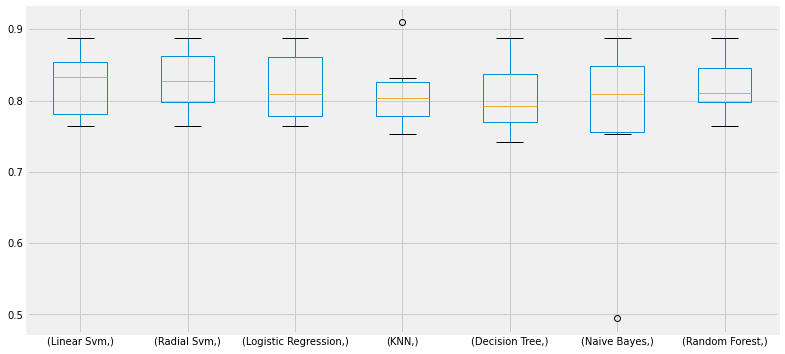

In [165]:
plt.subplots(figsize=(12, 6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

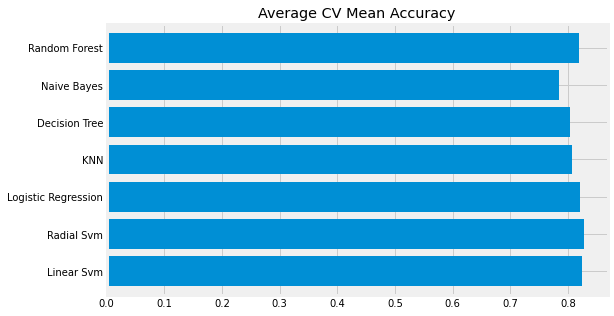

In [169]:
new_models_dataframe_2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

In [171]:
feature

,Pclass,SibSp,Parch,Age_band,Family_Size,Alone,Fare_cat,Sex_male,Embarked_Q,Embarked_S,Initial_Miss,Initial_Mr,Initial_Mrs,Initial_Other
0,3,1,0,1,1,0,0,1,0,1,0,1,0,0
1,1,1,0,2,1,0,3,0,0,0,0,0,1,0
2,3,0,0,1,0,1,1,0,0,1,1,0,0,0
3,1,1,0,2,1,0,3,0,0,1,0,0,1,0
4,3,0,0,2,0,1,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,1,0,1,1,1,0,1,0,0,0,1
887,1,0,0,1,0,1,2,0,0,1,1,0,0,0
888,3,1,2,1,3,0,2,0,0,1,1,0,0,0
889,1,0,0,1,0,1,2,1,0,0,0,1,0,0


In [180]:
pred = cross_val_predict(svm.SVC(kernel='rbf'), feature, target, cv=5)
confusion_matrix(target, pred)

array([[491,  58],
       [ 94, 248]])

## Hyper-parameter Tuning

### SVM

In [187]:
from sklearn.model_selection import GridSearchCV

C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {
    'kernel': kernel,
    'C': C,
    'gamma': gamma
}

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, 
                  verbose=True)
gd.fit(feature, target)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7,
                               0.8, 0.9, 1],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'kernel': ['rbf', 'linear']},
             verbose=True)

In [188]:
print(gd.best_score_)

0.8305065595380077


In [190]:
print(gd.best_estimator_)

SVC(C=0.5, gamma=0.2)


In [191]:
print(gd.best_params_)

{'C': 0.5, 'gamma': 0.2, 'kernel': 'rbf'}


### Random Forests

In [192]:
n_estimators = range(100, 1000, 100)
hyper = {
    'n_estimators': n_estimators
}
gd_2 = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, 
                    verbose=1)
gd_2.fit(feature, target)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': range(100, 1000, 100)}, verbose=1)

In [193]:
print(gd_2.best_score_)

0.8181972255351203


In [194]:
print(gd_2.best_params_)

{'n_estimators': 300}


## Ensembling

    1) Voting Classifier
    2) Bagging
    3) Boosting

In [195]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators = [
                                                  ('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                  ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.2)),
                                                  ('RFor', RandomForestClassifier(n_estimators=300, random_state=0)),
                                                  ('LR', LogisticRegression(C=0.05)),
                                                  ('DT', DecisionTreeClassifier(random_state=0)),
                                                  ('NB', GaussianNB()),
                                                  ('svm', svm.SVC(kernel='linear', probability=True))
], voting='soft')

In [196]:
ensemble_lin_rbf.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.2, probability=True)),
                             ('RFor',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=0)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=0)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [197]:
print(f"The accuracy for ensemble model is: {ensemble_lin_rbf.score(X_val, y_val)}")

The accuracy for ensemble model is: 0.8100558659217877


In [199]:
score = cross_val_score(ensemble_lin_rbf, feature, target, cv=10, scoring='accuracy')
print(f"The cross validated score is {score.mean()}")

The cross validated score is 0.8282896379525593


## Bagging

In [200]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), 
                          random_state=0, n_estimators=700)
model.fit(X_train, y_train)
pred = model.predict(X_val)
print(f"The accuracy for bagged KNN is: {accuracy_score(y_val, pred)}")

The accuracy for bagged KNN is: 0.8156424581005587


In [201]:
result = cross_val_score(model, feature, target, cv=10, scoring='accuracy')
print(f"The cross validated score for bagged KNN is: {result.mean()}")

The cross validated score for bagged KNN is: 0.8115480649188515


### Bagged DecisionTree

In [203]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=0, n_estimators=100)
model.fit(X_train, y_train)
pred = model.predict(X_val)
print(f"The accuracy for bagged Decision Tree is: {accuracy_score(y_val,pred)}")

The accuracy for bagged Decision Tree is: 0.8379888268156425


In [204]:
result = cross_val_score(model, feature, target, cv=10, scoring='accuracy')
print(f"The cross validated score for bagged Decision Tree is {result.mean()}")

The cross validated score for bagged Decision Tree is 0.8148938826466916


## Boosting

#### AdaBoost(Adaptive Boosting)

In [205]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result = cross_val_score(ada, feature, target, cv=10, scoring='accuracy')
print(f"The cross validated score for AdaBoost is: {result.mean()}")

The cross validated score for AdaBoost is: 0.8249188514357053


### Stochastic Gradient Boosting

In [206]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0,
                                  learning_rate=0.1)
result = cross_val_score(grad, feature, target, cv=10, scoring='accuracy')
print(f"The cross validated score for Gradient Boosting is: {result.mean()}")

The cross validated score for Gradient Boosting is: 0.8227590511860174


### XGBoost

In [207]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgb, feature, target, cv=10, scoring='accuracy')
print(f"The cross validated score for XGBoost is: {result.mean()}")

The cross validated score for XGBoost is: 0.8115355805243446


#### Hyper-parameter Tuning for AdaBoost

In [208]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {
    'n_estimators': n_estimators,
    'learning_rate': learn_rate
}
gd = GridSearchCV(estimator = AdaBoostClassifier(),
                  param_grid=hyper, verbose=True)
gd.fit(feature, target)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5,
                                           0.6, 0.7, 0.8, 0.9, 1],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=True)

In [209]:
print(gd.best_score_)
print(gd.best_params_)

0.8293892411022534
{'learning_rate': 0.1, 'n_estimators': 100}


## Confusion Matrix for the Best Model

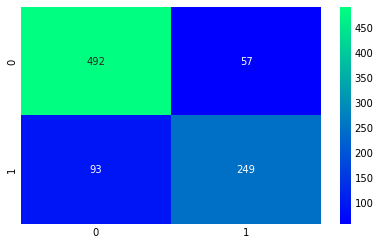

In [210]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result = cross_val_predict(ada, feature, target, cv=10)
sns.heatmap(confusion_matrix(target, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()